# Evaluate significance of principal component loadings classes differences

Script related to figure s5d

### Aim:
- Evaluate significance of PC loading differences

In [1]:
sessionInfo()

R version 3.5.0 (2018-04-23)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.5.0  IRdisplay_0.6.1 pbdZMQ_0.3-3    tools_3.5.0    
 [5] htmltools_0.3.6 base64enc_0.1-3 crayon_1.3.4    Rcpp_1.0.1     
 [9] uuid_0.1-2      IRkernel_0.8.14 jsonlite_1.6    digest_0.6.18  
[13] repr_0.17       evaluate_0.13  

In [1]:
setwd("~/git_repos/HGSOC_TME_Heterogeneity/")

## Load normalised enrichment scores data matched

In [2]:
data <- read.table('../../Data/5/HallmarksStromaImmune_NACT_unmatched_NES.txt',
                   row.names='Term',
                   header=T,
                   sep='\t')

In [3]:
data_pca = t(data)

### Plots

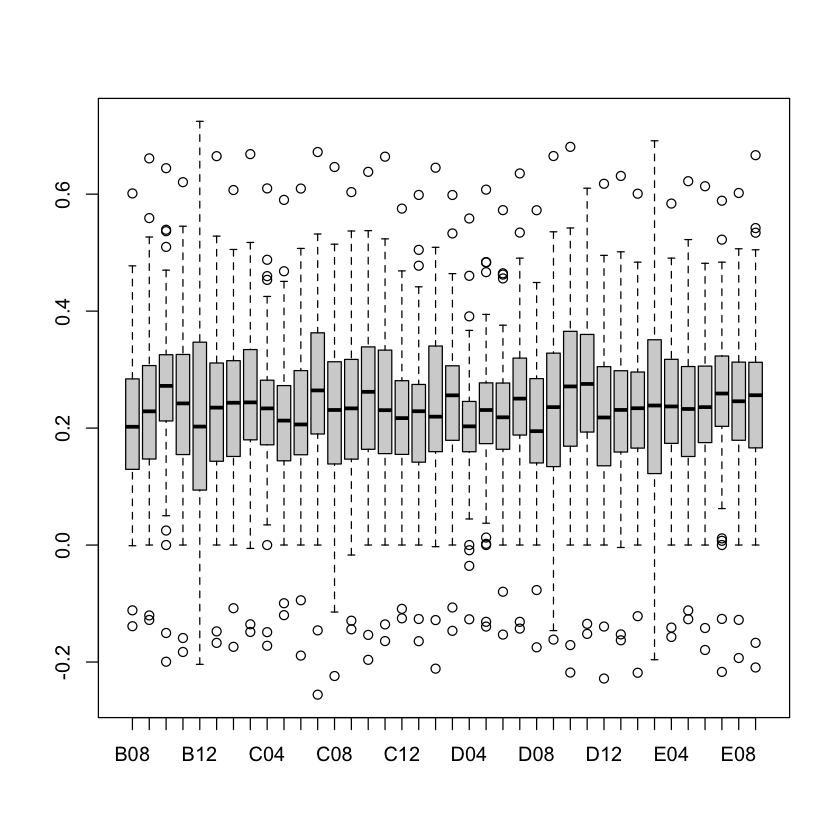

In [4]:
boxplot(data, col="light gray")

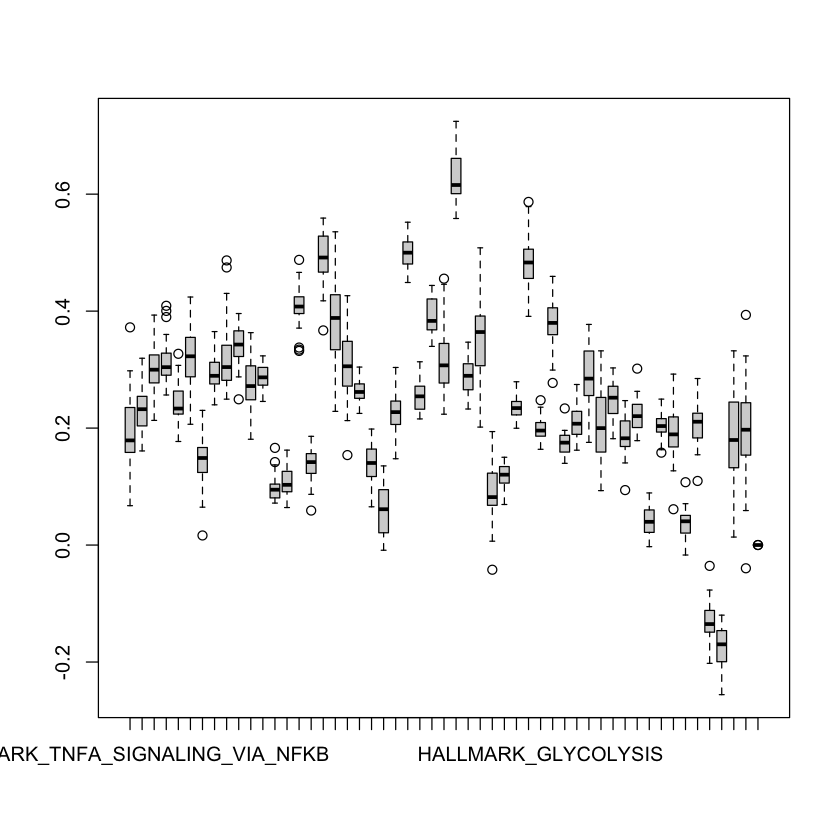

In [5]:
boxplot(t(data), col="light gray")

## PCA

### princomp on covmatrix

In [6]:
pca1 = princomp(covmat=cov(data_pca))

In [7]:
summary(pca1)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     0.1661641 0.1367680 0.1107186 0.09169947 0.05536277
Proportion of Variance 0.3189909 0.2161092 0.1416267 0.09714883 0.03541112
Cumulative Proportion  0.3189909 0.5351001 0.6767268 0.77387561 0.80928673
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.05134962 0.04124009 0.03715739 0.03701783 0.03247619
Proportion of Variance 0.03046341 0.01964912 0.01595124 0.01583164 0.01218524
Cumulative Proportion  0.83975014 0.85939926 0.87535050 0.89118214 0.90336738
                          Comp.11    Comp.12     Comp.13    Comp.14     Comp.15
Standard deviation     0.03061670 0.02916095 0.026889820 0.02520020 0.023989597
Proportion of Variance 0.01082981 0.00982443 0.008353716 0.00733689 0.006648901
Cumulative Proportion  0.91419719 0.92402162 0.932375335 0.93971223 0.946361126
                           Comp.16     Com

### prcomp on data (with n<p)

In [8]:
pca2 = prcomp(data_pca)

In [9]:
summary(pca2)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     0.1662 0.1368 0.1107 0.09170 0.05536 0.05135 0.04124
Proportion of Variance 0.3190 0.2161 0.1416 0.09715 0.03541 0.03046 0.01965
Cumulative Proportion  0.3190 0.5351 0.6767 0.77388 0.80929 0.83975 0.85940
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.03716 0.03702 0.03248 0.03062 0.02916 0.02689 0.02520
Proportion of Variance 0.01595 0.01583 0.01219 0.01083 0.00982 0.00835 0.00734
Cumulative Proportion  0.87535 0.89118 0.90337 0.91420 0.92402 0.93238 0.93971
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.02399 0.02308 0.02167 0.02071 0.01959 0.01893 0.01813
Proportion of Variance 0.00665 0.00615 0.00543 0.00496 0.00443 0.00414 0.00380
Cumulative Proportion  0.94636 0.95251 0.95794 0.96290 0.96733 0.97147 0.97527
                          PC22    PC23

In [10]:
names(pca2)

[1] "sdev"     "rotation" "center"   "scale"    "x"

### Same results (with sometimes different sign)

In [11]:
for(pw in 1:nrow(data_pca)){cat("dim",
                                pw,
                                ":\t",
                                cor(pca2$rotation[,pw],
                                    pca1$loadings[,pw]),
                                "\n")}

dim 1 :	 -1 
dim 2 :	 1 
dim 3 :	 1 
dim 4 :	 -1 
dim 5 :	 1 
dim 6 :	 1 
dim 7 :	 1 
dim 8 :	 1 
dim 9 :	 1 
dim 10 :	 1 
dim 11 :	 -1 
dim 12 :	 1 
dim 13 :	 1 
dim 14 :	 -1 
dim 15 :	 1 
dim 16 :	 -1 
dim 17 :	 -1 
dim 18 :	 1 
dim 19 :	 -1 
dim 20 :	 1 
dim 21 :	 1 
dim 22 :	 1 
dim 23 :	 1 
dim 24 :	 -1 
dim 25 :	 -1 
dim 26 :	 -1 
dim 27 :	 1 
dim 28 :	 -1 
dim 29 :	 -1 
dim 30 :	 -1 
dim 31 :	 1 
dim 32 :	 1 
dim 33 :	 1 
dim 34 :	 -1 
dim 35 :	 1 
dim 36 :	 1 
dim 37 :	 1 
dim 38 :	 -0.3309412 


## IDs

In [12]:
n.obs = nrow(data_pca)
n.obs

[1] 38

In [13]:
id.obs = (data.frame(pos=1:n.obs,
                     id=rownames(data_pca),
                     patient = sapply(rownames(data_pca),
                                      function(x)substr(x,2,nchar(x)-1)),
                                      stringsAsFactors = FALSE))

In [14]:
id.obs

pos id  patient
B08  1  B08 0      
B09  2  B09 0      
B10  3  B10 1      
B11  4  B11 1      
B12  5  B12 1      
C01  6  C01 0      
C02  7  C02 0      
C03  8  C03 0      
C04  9  C04 0      
C05 10  C05 0      
C06 11  C06 0      
C07 12  C07 0      
C08 13  C08 0      
C09 14  C09 0      
C10 15  C10 1      
C11 16  C11 1      
C12 17  C12 1      
D01 18  D01 0      
D02 19  D02 0      
D03 20  D03 0      
D04 21  D04 0      
D05 22  D05 0      
D06 23  D06 0      
D07 24  D07 0      
D08 25  D08 0      
D09 26  D09 0      
D10 27  D10 1      
D11 28  D11 1      
D12 29  D12 1      
E01 30  E01 0      
E02 31  E02 0      
E03 32  E03 0      
E04 33  E04 0      
E05 34  E05 0      
E06 35  E06 0      
E07 36  E07 0      
E08 37  E08 0      
E09 38  E09 0

In [15]:
temp = table(id.obs$patient)    
n.patient = length(temp)
n.patient

[1] 2

In [16]:
id.patient = (data.frame(pos=1:n.patient,
                         id=names(temp),
                         n=c(temp),
                         stringsAsFactors = FALSE))

In [17]:
n.var  = ncol(data_pca)
n.var

[1] 53

In [18]:
id.var = (data.frame(pos=1:n.var,
                     id=colnames(data_pca),
                     type=data[,ncol(data)],
                     stringsAsFactors = FALSE))

In [19]:
all(rownames(data)==id.var$id)

[1] TRUE

In [20]:
temp = table(id.var$type)

In [21]:
n.type = length(temp)

In [22]:
id.type = (data.frame(pos=1:n.type,
                      id=names(temp),
                      n=c(temp),
                      stringsAsFactors = FALSE))

## Define bootstrap types considered

In [23]:
n.boot  = 3

a = "0 Cluster bootstrap" # Bootstrap observations w/o patience dependence
b = "1 Cluster bootstrap" # Bootstrap the clusters i.e. include patience dependence but ignores within patient variability
c = "2 Cluster bootstrap" # Bootstrap the clusters and the samples within clusters

### c Takes into account within patient dependece and the between patint variability

### b and c vs a -> effect of ignoring the within paceint dependence
### b vs c -> sensistivity analysis

boot_names = c(a,b,c)

id.boot = data.frame(pos=1:n.boot,
                     id=paste0("boot",0:(n.boot-1)),
                     name=boot_names,
                     stringsAsFactors=FALSE)

## Original estimates

In [24]:
n.comp = 5
original_pca = princomp(covmat=cov(data_pca))
mx.loadings_original.pc = original_pca$loadings[,1:n.comp]

In [25]:
head(mx.loadings_original.pc)

Comp.1        Comp.2     Comp.3      
HALLMARK_TNFA_SIGNALING_VIA_NFKB     0.2694229443 0.09143407  0.227621478
HALLMARK_HYPOXIA                     0.1301217973 0.10660371  0.217185615
HALLMARK_CHOLESTEROL_HOMEOSTASIS    -0.0261577591 0.23247429  0.101469397
HALLMARK_MITOTIC_SPINDLE            -0.0246468628 0.21495404 -0.035953421
HALLMARK_WNT_BETA_CATENIN_SIGNALING -0.0009115067 0.17093145  0.007196883
HALLMARK_TGF_BETA_SIGNALING          0.1082515749 0.24892406  0.237329746
                                    Comp.4       Comp.5     
HALLMARK_TNFA_SIGNALING_VIA_NFKB     0.229853682  0.27763234
HALLMARK_HYPOXIA                     0.004305766  0.08196232
HALLMARK_CHOLESTEROL_HOMEOSTASIS     0.085502030  0.14069161
HALLMARK_MITOTIC_SPINDLE            -0.162916844  0.01569552
HALLMARK_WNT_BETA_CATENIN_SIGNALING -0.004602226  0.04785242
HALLMARK_TGF_BETA_SIGNALING          0.077654508 -0.14183530

### Bootstrap observation coordinates according to each method

In [26]:
set.seed(478)

#### Bootstrap model (10,000 bootstrap replicates per bootstrap model)

In [27]:
n.R = 10000
k_r_boot = as.list(rep(NA,n.boot))
names(k_r_boot) = id.boot$id

### 0 Cluster bootstrap
##### Bootstrap observations w/o patience dependencies

In [28]:
k_r_boot[[1]] = lapply(1:n.R,function(x){
    sample(id.obs$pos,n.obs,replace=TRUE)
    })

### 1 Cluster bootstrap

##### Bootstrap the clusters i.e. include patience dependency

In [29]:
k_patient = split(id.obs$pos,id.obs$patient)

In [30]:
k_r_boot[[2]] = lapply(1:n.R,function(x){
    unlist(k_patient[sample(id.patient$pos,n.patient,replace=TRUE)])
    })


### 2 Cluster bootstrap

#### Bootstrap the clusters adn the samples within clusters

In [31]:
k_patient = split(id.obs$pos,id.obs$patient)

In [32]:
k_r_boot[[3]] = lapply(1:n.R,function(x){
    unlist(lapply(k_patient[sample(id.patient$pos,n.patient,replace=TRUE)],
                  function(x)sample(x,length(x),replace=TRUE)))
    })

In [33]:
lapply(k_r_boot,length)

$boot0
[1] 10000

$boot1
[1] 10000

$boot2
[1] 10000

In [34]:
head(k_r_boot[[3]][[1]])

01 02 03 04 05 06 
10 21 14  9  1 36

## PCA's loading per simulated sample and bootstrap type

In [35]:
loadings1toc_r_boot = lapply(k_r_boot,function(x){
    lapply(x,function(y){
        princomp(covmat=cov(data_pca[y,]))$loadings[,1:n.comp]
        })
    })

In [36]:
ar.loadings.pcr_boot = lapply(loadings1toc_r_boot,
                              function(x)array(unlist(x),
                                               dim=c(nrow(x[[1]]),
                                                     ncol(x[[1]]),
                                                     n.R),
                                               dimnames=list(rownames(x[[1]]),
                                                             colnames(x[[2]]),
                                                             1:n.R)))

### Plot 10 first hallmark loadings of the first 1000 bootstraps

##### Note: colour only is used to see if there is any potential bias in the boostraps (it does not look like)

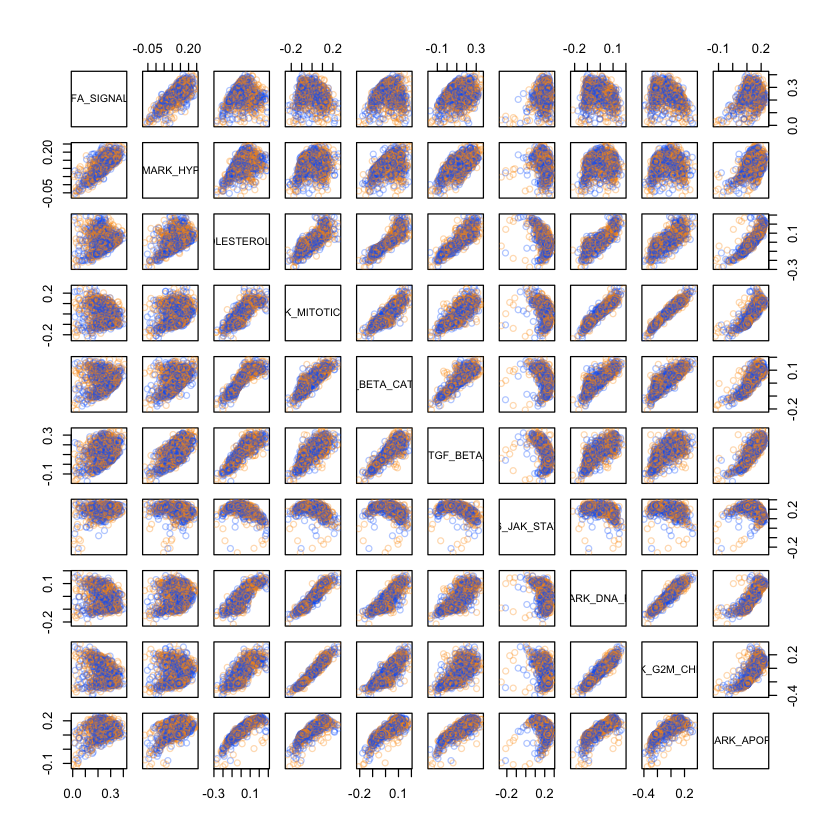

In [37]:
pairs(t(ar.loadings.pcr_boot[[3]][1:10,1,1:1000]),
      col=paste0(substr(rainbow(10)[c(2,7)],1,7),50))

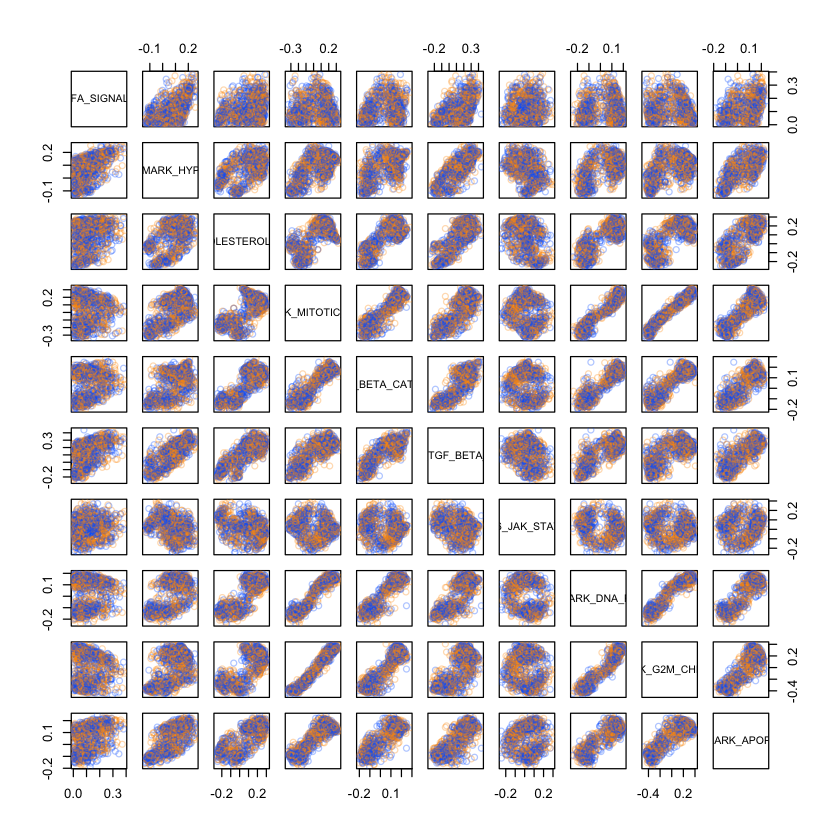

In [38]:
pairs(t(ar.loadings.pcr_boot[[3]][1:10,2,1:1000]),
      col=paste0(substr(rainbow(10)[c(2,7)],1,7),50))

### Change loading sign when required and match order of the dimension (Method 1)

In [39]:
manipulation1_r_boot = lapply(ar.loadings.pcr_boot,function(x,original){
    
    apply(x,3,function(y,original){ # original = mx.loadings.pc;y = ar.loadings.pcr_boot[[1]][,,1]
    
        # solution:
        # change signs to match
        # for each permutation, calculate sum of squares to define matching loadings 
        out = matrix(t(apply(y,2,function(x,original){ # x=y[,1]            
            score = rbind(apply(original-x,2,function(x)sum(x^2)),
                                apply(original+x,2,function(x)sum(x^2)))            
            score = score==min(score)                                      
            pos   = which(apply(score,2,sum)==1)                                           
            sign  = c(1,-1)[which(apply(score,1,sum)==1)]
                                      c(pos,sign)                                  
                                      },
                                      
                                      original=original)),
                          
                          nrow=ncol(original),
                          ncol=2,
                          dimnames=list(paste0("comp",1:ncol(original)),
                                        c("position","sign")))
            
            as.data.frame(out)
            },
                             
                             original = original)
    },
                       original = mx.loadings_original.pc)

In [40]:
lapply(manipulation1_r_boot,
       function(x)table(unlist(lapply(x,function(x)length(tabulate(x[,1]))))))

$boot0

   3    4    5 
   2  427 9571 

$boot1

    5 
10000 

$boot2

   3    4    5 
  19  904 9077 


#### COMMENT: duplicated dimension frequent but in low ranks

In [41]:
manipulation1_r_boot[[3]][[1]]

position sign
comp1 1         1  
comp2 2        -1  
comp3 3         1  
comp4 4         1  
comp5 5         1

### Change loading sign when required and match order of the dimension (Method 2)

#### Sensitivity analysis of method 1 (both provide similar results)

In [42]:
.coord = function(n.dk,n.tk){
    
    n.k=length(n.tk)
    if(n.k!=length(n.dk)){stop("coord and dimarray are different length")}
    
    for(k in 1:n.k){if(n.dk[k]>n.tk[k]){stop(cat("in dim", k, "n.dk > n.tk  :"))}}

    # calc
    temp=rep(n.dk[1],n.k)
    for(k in 1:(n.k-1)){temp[k]=prod(n.tk[1:(n.k-k)])*(n.dk[(n.k-k+1)]-1)}
    sum(temp)
    }

In [43]:
permutation = expand.grid(1:n.comp,1:n.comp,1:n.comp,1:n.comp,1:n.comp)

In [44]:
permutation = permutation[apply(permutation,1,function(x)length(unique(x))==n.comp),]

In [45]:
permutation.k = permutation

In [46]:
for(cw in 1:ncol(permutation)){
    permutation.k[,cw] = apply(cbind(permutation[,cw],cw),
                               1,
                               .coord,
                               n.tk=c(ncol(permutation),
                                      ncol(permutation)))
    }

In [47]:
manipulation2_r_boot = lapply(ar.loadings.pcr_boot,function(x,original,p,k,w){
    
    apply(x,3,function(y,original,p,k,w){ # original = mx.loadings.pc;y = ar.loadings.pcr_boot[[1]][,,1]
        
        n.cw = ncol(original)
        
        # cor:
        mx.cor.cc = matrix(NA,n.cw,n.cw)
        
        for(i in 1:n.cw){
            x = y[,i]
            for(j in 1:n.cw){mx.cor.cc[i,j] = cor(x,original[,j],method="pearson")}
            }
        
        # solution:
        # for all permutation, pick the highest weighted correlation mean 
        # (weighted by variance of components)
        crit.perm = apply(matrix(abs(mx.cor.cc)[unlist(k)],ncol=n.cw)*matrix(rep(w,each=nrow(k)),ncol=n.cw),1,sum)
        
        # out
        k.best = which(crit.perm==max(crit.perm))
        
        out = data.frame(position=unlist(p[k.best,]),
                         sign=sign(mx.cor.cc[unlist(k[k.best,])]),
                         corr=mx.cor.cc[unlist(k[k.best,])])
        out                                                                                                      
        },original = original,p=p,k=k,w=w)
        },original = mx.loadings_original.pc,
                              p=permutation,
                              k=permutation.k,
                              w=original_pca$sdev[1:ncol(permutation)]^1/sum(original_pca$sdev[1:ncol(permutation)]^1))

### Use correction method 1 and then delete outliers

In [48]:
ar.loadings_corr.pcr_boot = ar.loadings.pcr_boot

#### Change position and sign of principal components when required

In [49]:
for(bw in 1:n.boot){    
    for(rw in 1:n.R){        
        ar.loadings_corr.pcr_boot[[bw]][,,rw]=ar.loadings.pcr_boot[[bw]][,manipulation1_r_boot[[bw]][[rw]]$position,rw]*rep(manipulation1_r_boot[[bw]][[rw]]$sign[manipulation1_r_boot[[bw]][[rw]]$position],each=n.var) 
        }
} 

### Visualise

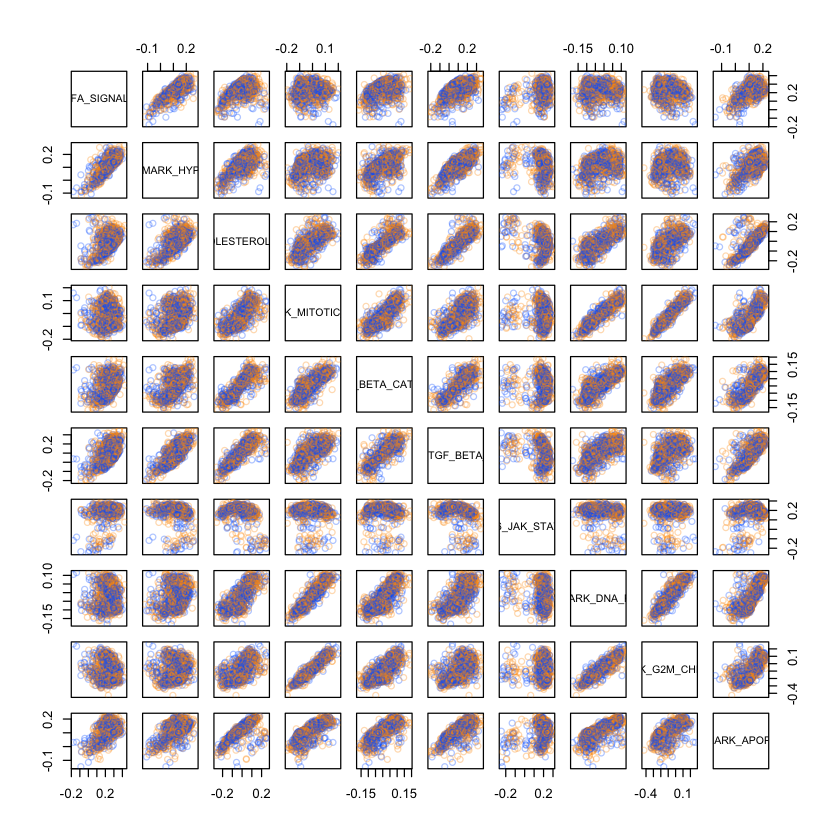

In [50]:
pairs(t(ar.loadings_corr.pcr_boot[[3]][1:10,1,1:1000]),
      col=paste0(substr(rainbow(10)[c(2,7)],1,7),50))

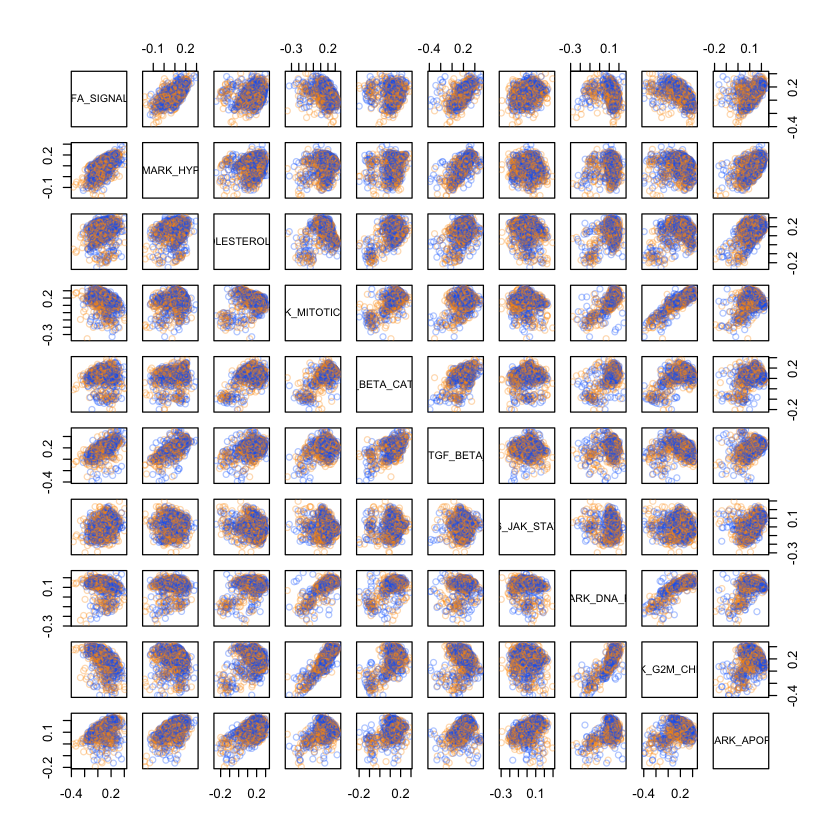

In [51]:
pairs(t(ar.loadings_corr.pcr_boot[[3]][1:10,2,1:1000]),
      col=paste0(substr(rainbow(10)[c(2,7)],1,7),50))

### COMMENTS:
#### 1) With the correction we see no pattern in the data (as expected) but still there are some outliers that we want to detect and delete, since these are most likely random artefacts of the bootstraps
#### 2) We expect the bivariate distribution of the loadings to be ~ normal, although there is no assumption on the distribution of the loadings themselves for the bootstrap analysis
#### 3) Therefore, the outliers in the bivariate plots, are most likely artefacts

## Use robust estimator analysis to detect outliers

#### Assumption: distribution of bivariate data is aprroximately normal

In [52]:
path.sc = ""
source(paste(path.sc,"covREM.r",sep=""))
source(paste(path.sc,"AttrPsyFunc.r",sep=""))

In [53]:
notoutliers.r_boot = lapply(ar.loadings_corr.pcr_boot,function(x){
    
    apply(apply(x[,1:2,],
                2,
                function(x){
                    covREM(t(x))$w==0
                }),
          1,
          sum)==0
})

Loading required package: robustbase
Warning message in covMcd(complete):
“The covariance matrix of the data is singular.
There are 10000 observations (in the entire dataset of 10000 obs.)
lying on the hyperplane with equation a_1*(x_i1 - m_1) + ... +
a_p*(x_ip - m_p) = 0 with (m_1, ..., m_p) the mean of these
observations and coefficients a_i from the vector a <- c(-0.1201009,
-0.1763488, 0.0009405, -0.1091196, -0.1405741, 0.0880541, 0.1127557,
-0.0310671, 0.1133932, 0.1289785, 0.0041226, -0.1150621, -0.029089,
0.0088445, -0.1186108, 0.1158093, 0.0017715, -0.0094911, -0.2018204,
-0.07446, -0.1105421, 0.0179231, 0.1889382, 0.1533218, -0.1440273,
-0.2212434, 0.0636677, -0.1108982, 0.074255, -0.3451085, 0.4833867,
-0.0105575, -0.0343702, 0.1151154, -0.0463036, 0.0355557, 0.0162637,
0.0053828, 0.2731673, 0.0535119, 0.0526865, -0.0340173, -0.0947556,
-0.1191947, 0.1416001, -0.2045688, 0.135491, 0.0062489, -0.1326591,
-0.0388592, 0.2070178, -0.0517238, 9.7e-06 )”Warning message:
“No missing

### Check manipulation results: 
#### For dim1 and 2, compare ORIGINAL loadings versus CORRECTED ONES

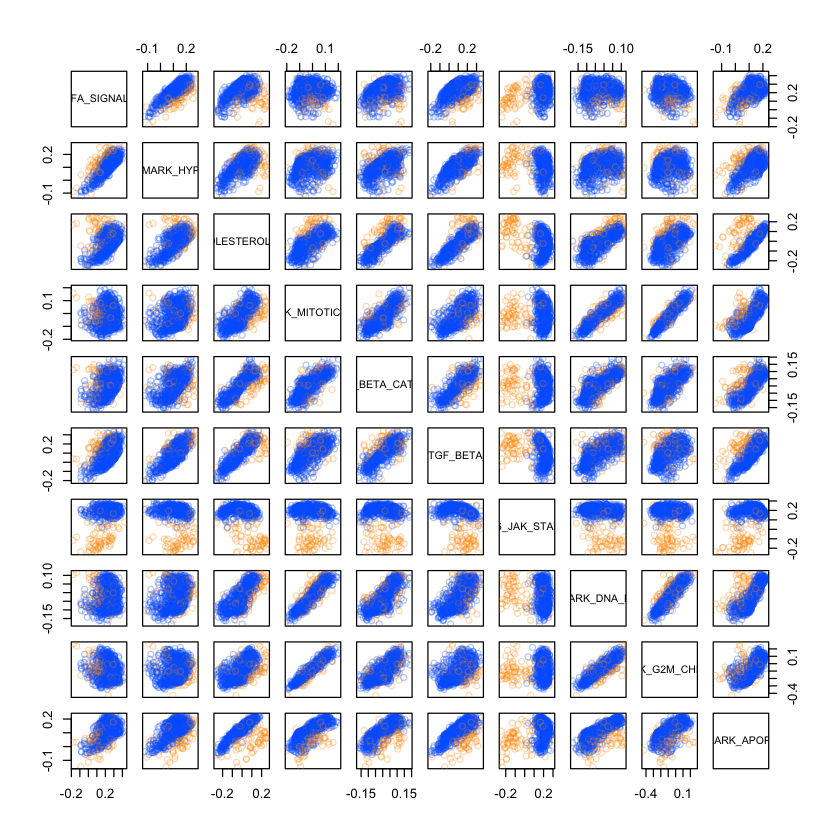

In [54]:
pairs(t(ar.loadings_corr.pcr_boot[[3]][1:10,1,1:1000]),
      col=paste0(substr(rainbow(10)[c(2,7)],1,7),50)[as.numeric(notoutliers.r_boot[[3]])+1])

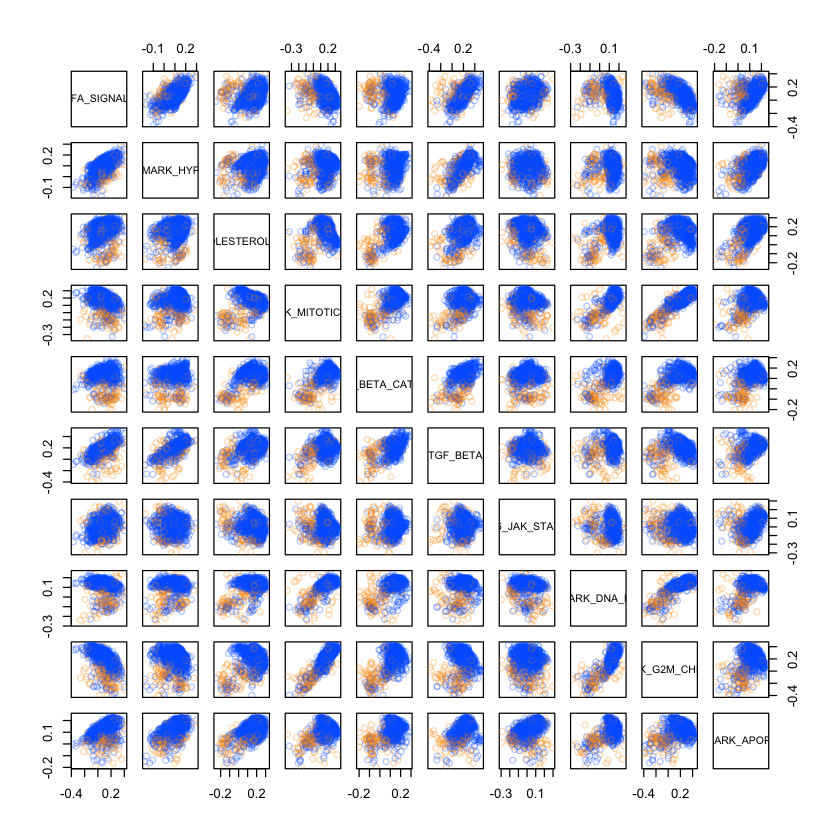

In [55]:
pairs(t(ar.loadings_corr.pcr_boot[[3]][1:10,2,1:1000]),
      col=paste0(substr(rainbow(10)[c(2,7)],1,7),50)[as.numeric(notoutliers.r_boot[[3]])+1])

### COMMENT:
#### Robust estimator detected the outliers

## Compare bootstrap methods a, b, and c, and evaluate feature categories differences

### For bootstrap 3: mean loading values per group of variable

In [56]:
ar.mean.rtdb = array(NA,dim=c(n.R,n.type,2,n.boot),
                     dimnames=list(1:n.R,id.type$id,paste0("comp.",1:2),id.boot$id))

In [57]:
for(bw in 1:n.boot){# bw = tw = rw = 3
    for(rw in 1:n.R){
        ar.mean.rtdb[rw,,,bw] = apply(as.data.frame(ar.loadings_corr.pcr_boot[[bw]][,1:2,rw]),2,function(x)sapply(split(x,id.var$type),mean)) 
        }
   cat(".\n")   
}              

.
.
.


### Define 95% bootstrap confidence interval

In [58]:
ar.loadings.2tcb = apply(ar.mean.rtdb[,,,],2:4,quantile,prob=c(.025,.975))

### Plot

Warning message in arrows(tw + c(-0.1, 0, 0.1)[bw], ar.loadings.2tcb[1, tw, dimw, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(tw + c(-0.1, 0, 0.1)[bw], ar.loadings.2tcb[1, tw, dimw, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(tw + c(-0.1, 0, 0.1)[bw], ar.loadings.2tcb[1, tw, dimw, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(tw + c(-0.1, 0, 0.1)[bw], ar.loadings.2tcb[1, tw, dimw, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(tw + c(-0.1, 0, 0.1)[bw], ar.loadings.2tcb[1, tw, dimw, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(tw + c(-0.1, 0, 0.1)[bw], ar.loadings.2tcb[1, tw, dimw, :
“zero-length arrow is of indeterminate angle and so skipped”

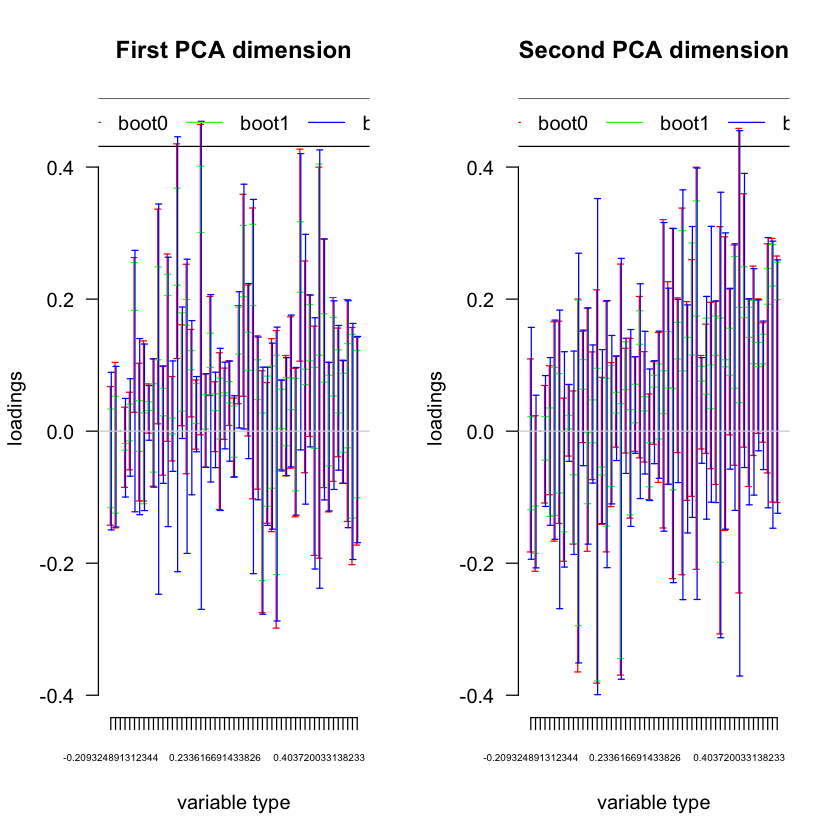

In [59]:
par(mfrow=c(1,2))

# dimension 1:
dimw = 1

plot(1,1,pch="",xlim=c(1,n.type)+c(-.5,+.5),ylim=range(ar.loadings.2tcb),
    axes=FALSE,ylab="loadings",xlab="variable type",main="First PCA dimension")

axis(2,las=2)
axis(1,1:n.type,id.type$id,cex.axis=.5)

for(tw in 1:n.type){
    for(bw in 1:n.boot){
        arrows(tw+c(-.1,0,.1)[bw],ar.loadings.2tcb[1,tw,dimw,bw],tw+c(-.1,0,.1)[bw],ar.loadings.2tcb[2,tw,dimw,bw],angle=90,length=.025,code=3,col=rainbow(n.boot)[bw])
        }
    }

abline(h=0,col="light gray")    
legend("top",ncol=n.boot,id.boot$id,lty=rep(1,n.boot),col=rainbow(n.boot))

# dimension 2:
dimw = 2
plot(1,1,pch="",xlim=c(1,n.type)+c(-.5,+.5),ylim=range(ar.loadings.2tcb),
    axes=FALSE,ylab="loadings",xlab="variable type",main="Second PCA dimension")

axis(2,las=2)
axis(1,1:n.type,id.type$id,cex.axis=.5)

for(tw in 1:n.type){
    for(bw in 1:n.boot){
        arrows(tw+c(-.1,0,.1)[bw],ar.loadings.2tcb[1,tw,dimw,bw],tw+c(-.1,0,.1)[bw],ar.loadings.2tcb[2,tw,dimw,bw],angle=90,length=.025,code=3,col=rainbow(n.boot)[bw])
        }
    }

abline(h=0,col="light gray")    
legend("top",ncol=n.boot,id.boot$id,lty=rep(1,n.boot),col=rainbow(n.boot))

# End script